In [4]:
!pip install plotnine

     |████████████████████████████████| 1.2 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 9.4 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 21.7 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 12.2 MB 25.9 MB/s eta 0:00:01    |██████████████▉                 | 5.6 MB 25.9 MB/s eta 0:00:01
     |████████████████████████████████| 960 kB 76.6 MB/s eta 0:00:01
     |████████████████████████████████| 295 kB 75.5 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 22.5 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 17.1 MB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 16.9 MB 26.0 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 9.4 MB/s  eta 0:00:01
  Attempting uninstall: numpy
    Foun

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
#import plotnine

In [16]:
df=pd.read_csv('diabetes.csv')
print(df.columns,"\n","Shape:",df.shape)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') 
 Shape: (768, 9)


In [18]:
df['Outcome'].drop_duplicates()

0    1
1    0
Name: Outcome, dtype: int64

In [22]:
train, test = train_test_split(df, test_size=0.2, random_state=0)
train, val = train_test_split(train, test_size=0.125, random_state=0)

In [23]:
print(f"Base total: {df.shape}")
print(f"Treino: {train.shape}")
print(f"Validação: {val.shape}")
print(f"Test: {test.shape}")

Base total: (768, 9)
Treino: (537, 9)
Validação: (77, 9)
Test: (154, 9)


In [24]:
pd.isna(df).sum().to_frame("Valor Vazio")

,Valor Vazio
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [25]:
train.iloc[:,0:8] = MinMaxScaler().fit_transform(train.iloc[:,0:8])
val.iloc[:,0:8] = MinMaxScaler().fit_transform(val.iloc[:,0:8])
test.iloc[:,0:8] = MinMaxScaler().fit_transform(test.iloc[:,0:8])

/home/saulo/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  #  we can short-circuit


In [26]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
301,0.117647,0.727273,0.475410,0.333333,0.159574,0.470939,0.146883,0.078431,1
712,0.588235,0.651515,0.508197,0.363636,0.000000,0.614009,0.154996,0.333333,1
294,0.000000,0.813131,0.409836,0.000000,0.000000,0.326379,0.075149,0.862745,0
209,0.411765,0.929293,0.688525,0.333333,0.000000,0.529061,0.118275,0.392157,1
717,0.588235,0.474747,0.590164,0.181818,0.000000,0.344262,0.220751,0.686275,0
...,...,...,...,...,...,...,...,...,...
715,0.411765,0.944444,0.409836,0.333333,0.463357,0.505216,0.319385,0.254902,1
530,0.117647,0.616162,0.491803,0.181818,0.125296,0.444113,0.272844,0.019608,0
93,0.235294,0.676768,0.590164,0.000000,0.000000,0.354694,0.084970,0.764706,1
628,0.294118,0.646465,0.655738,0.000000,0.000000,0.515648,0.028181,0.470588,0


In [27]:
train_x = train.drop(columns=['Outcome'],axis=1)
train_y = train['Outcome']

In [29]:
val_x = val.drop(columns=['Outcome'],axis=1)
val_y = val['Outcome']

test_x = test.drop(columns=['Outcome'],axis=1)
test_y = test['Outcome']

In [31]:
LR = LogisticRegression(solver='lbfgs',max_iter=10000).fit(train_x,train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x,train_y)
DT = DecisionTreeClassifier().fit(train_x,train_y)
KN = KNeighborsClassifier().fit(train_x,train_y)
SVM = SVC().fit(train_x,train_y)
RF = RandomForestClassifier().fit(train_x,train_y)

In [33]:
metricas_treino = {
    'Accuracy':[LR.score(train_x,train_y),
               LDA.score(train_x,train_y),
               DT.score(train_x,train_y),
               KN.score(train_x,train_y),
               SVM.score(train_x,train_y),
               RF.score(train_x,train_y)],
    'Precision':[precision_score(train_y,LR.predict(train_x)),
                precision_score(train_y,LDA.predict(train_x)),
                precision_score(train_y,DT.predict(train_x)),
                precision_score(train_y,KN.predict(train_x)),
                precision_score(train_y,SVM.predict(train_x)),
                precision_score(train_y,RF.predict(train_x))],
    'Recall':[recall_score(train_y,LR.predict(train_x)),
             recall_score(train_y,LDA.predict(train_x)),
             recall_score(train_y,DT.predict(train_x)),
             recall_score(train_y,KN.predict(train_x)),
             recall_score(train_y,SVM.predict(train_x)),
             recall_score(train_y,RF.predict(train_x))]
}
dados = pd.DataFrame(metricas_treino,
                     columns=['Accuracy','Precision','Recall'],
                    index=['LR','LDA','DT','KN','SVM','RF'])
dados

,Accuracy,Precision,Recall
LR,0.765363,0.748092,0.513089
LDA,0.772812,0.728477,0.575916
DT,1.000000,1.000000,1.000000
KN,0.800745,0.765823,0.633508
SVM,0.797020,0.805970,0.565445
RF,1.000000,1.000000,1.000000


In [34]:
metricas_treino = {
    'Accuracy':[LR.score(val_x,val_y),
               LDA.score(val_x,val_y),
               DT.score(val_x,val_y),
               KN.score(val_x,val_y),
               SVM.score(val_x,val_y),
               RF.score(train_x,train_y)],
    'Precision':[precision_score(val_y,LR.predict(val_x)),
                precision_score(val_y,LDA.predict(val_x)),
                precision_score(val_y,DT.predict(val_x)),
                precision_score(val_y,KN.predict(val_x)),
                precision_score(val_y,SVM.predict(val_x)),
                precision_score(val_y,RF.predict(val_x))],
    'Recall':[recall_score(val_y,LR.predict(val_x)),
             recall_score(val_y,LDA.predict(val_x)),
             recall_score(val_y,DT.predict(val_x)),
             recall_score(val_y,KN.predict(val_x)),
             recall_score(val_y,SVM.predict(val_x)),
             recall_score(val_y,RF.predict(val_x))]
}
dados = pd.DataFrame(metricas_treino,
                     columns=['Accuracy','Precision','Recall'],
                    index=['LR','LDA','DT','KN','SVM','RF'])
dados

,Accuracy,Precision,Recall
LR,0.753247,0.923077,0.400000
LDA,0.727273,0.800000,0.400000
DT,0.740260,0.750000,0.500000
KN,0.779221,0.882353,0.500000
SVM,0.740260,0.857143,0.400000
RF,1.000000,0.764706,0.433333


In [35]:
metricas_treino = {
    'Accuracy':[LR.score(test_x,test_y),
               LDA.score(test_x,test_y),
               DT.score(test_x,test_y),
               KN.score(test_x,test_y),
               SVM.score(test_x,test_y),
               RF.score(test_x,test_y)],
    'Precision':[precision_score(test_y,LR.predict(test_x)),
                precision_score(test_y,LDA.predict(test_x)),
                precision_score(test_y,DT.predict(test_x)),
                precision_score(test_y,KN.predict(test_x)),
                precision_score(test_y,SVM.predict(test_x)),
                precision_score(test_y,RF.predict(test_x))],
    'Recall':[recall_score(test_y,LR.predict(test_x)),
             recall_score(test_y,LDA.predict(test_x)),
             recall_score(test_y,DT.predict(test_x)),
             recall_score(test_y,KN.predict(test_x)),
             recall_score(test_y,SVM.predict(test_x)),
             recall_score(test_y,RF.predict(test_x))]
}
dados = pd.DataFrame(metricas_treino,
                     columns=['Accuracy','Precision','Recall'],
                    index=['LR','LDA','DT','KN','SVM','RF'])
dados

,Accuracy,Precision,Recall
LR,0.766234,0.582090,0.829787
LDA,0.753247,0.561644,0.872340
DT,0.688312,0.492308,0.680851
KN,0.746753,0.574074,0.659574
SVM,0.785714,0.634615,0.702128
RF,0.766234,0.600000,0.702128


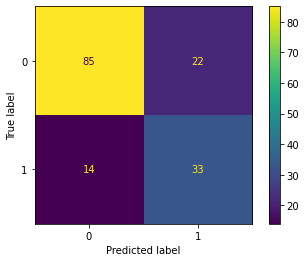

In [36]:
plot_confusion_matrix(RF,test_x,test_y)
plt.show()

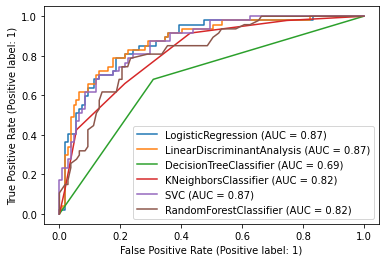

In [37]:
plot_roc_curve(LR,test_x,test_y,ax=plt.gca())
plot_roc_curve(LDA,test_x,test_y,ax=plt.gca())
plot_roc_curve(DT,test_x,test_y,ax=plt.gca())
plot_roc_curve(KN,test_x,test_y,ax=plt.gca())
plot_roc_curve(SVM,test_x,test_y,ax=plt.gca())
plot_roc_curve(RF,test_x,test_y,ax=plt.gca())

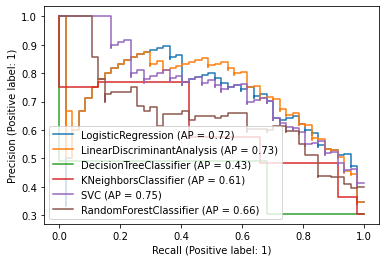

In [38]:
plot_precision_recall_curve(LR,test_x,test_y,ax=plt.gca())
plot_precision_recall_curve(LDA,test_x,test_y,ax=plt.gca())
plot_precision_recall_curve(DT,test_x,test_y,ax=plt.gca())
plot_precision_recall_curve(KN,test_x,test_y,ax=plt.gca())
plot_precision_recall_curve(SVM,test_x,test_y,ax=plt.gca())
plot_precision_recall_curve(RF,test_x,test_y,ax=plt.gca())